In [1]:
import pandas as pd
import numpy as np; np.random.seed()

#import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
y_train = X_train.Survived

In [4]:
X_train.isna().mean()  # Доля пропусков в данных (NaN значений) по столбцам

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
X_test.isna().mean()  # Доля пропусков в данных (NaN значений) по столбцам

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [6]:
X = X_train.merge(X_test, how='outer')  # Для вычисления среднего возраста
med = X.Age.median()

X_train.fillna({'Age': med}, inplace=True)
X_test.fillna({'Age': med}, inplace=True)

X_train['Age'] = X_train['Age'].astype(int)
X_test['Age'] = X_train['Age'].astype(int)

X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# Дропаем ненужные колонки
X_train.index = X_train['PassengerId']
X_test.index = X_test['PassengerId']
X_train.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_train.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S


In [8]:
X_train['NameLen'] = X_train['Name'].str.len()
X_test['NameLen'] = X_test['Name'].str.len()

X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)

In [9]:
X_train['Family'] = X_train['SibSp'] + X_train['Parch']
X_train['Family'].loc[X_train['Family'] > 0] = 1
X_train['Family'].loc[X_train['Family'] == 0] = 0

X_test['Family'] = X_test['SibSp'] + X_test['Parch']
X_test['Family'].loc[X_test['Family'] > 0] = 1
X_test['Family'].loc[X_test['Family'] == 0] = 0

X_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
X_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

C:\Users\sergs\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
# Разворачиваем колонки Sex и Embarked
X_train = pd.get_dummies(X_train)  
X_test = pd.get_dummies(X_test)

# Дропаем избыточные
X_train.drop(['Sex_male', 'Embarked_S'], axis=1, inplace=True)
X_test.drop(['Sex_male', 'Embarked_S'], axis=1, inplace=True)

X_train.head()

,Pclass,Age,Fare,NameLen,Family,Sex_female,Embarked_C,Embarked_Q
PassengerId,,,,,,,,
1,3,22,7.2500,23,1,0,0,0
2,1,38,71.2833,51,1,1,1,0
3,3,26,7.9250,22,0,1,0,0
4,1,35,53.1000,44,1,1,0,0
5,3,35,8.0500,24,0,0,0,0


In [11]:
# У Fare в тестовых данных тоже были пропуски, заполним их медианой
med = (X.Fare.median()) // 2

X_train.fillna({'Fare': med}, inplace=True)
X_test.fillna({'Fare': med}, inplace=True)

In [12]:
# Наивный Байес

clf = GaussianNB()
clf.fit(X_train, y_train)

s = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

(0.752078153420808, 0.04278197590468819)

In [13]:
# Логистическая регрессия

clf = LogisticRegression()
clf.fit(X_train, y_train)

s = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

C:\Users\sergs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7923833608708744, 0.016791122591523162)

In [14]:
# kNN - k ближайших соседей

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

s = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

(0.6936692381374906, 0.02536880685891855)

In [15]:
# SVM

clf = SVC()
clf.fit(X_train, y_train)

s = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

C:\Users\sergs\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.621833386706159, 0.018672839121063347)

In [16]:
# Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)

s = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

(0.5791936057581654, 0.10386334900789085)

In [17]:
# Решающие деревья

clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1, 10, 1), 
              'min_samples_split': range(2, 10, 1), 
              'min_samples_leaf': range(1, 10, 1)}
search_cv = GridSearchCV(clf, parameters, cv=5, n_jobs=-1) #, n_iter=500)

search_cv.fit(X_train, y_train);
best_clf = search_cv.best_estimator_

s = cross_val_score(best_clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

(0.8271777265445935, 0.01372241380086068)

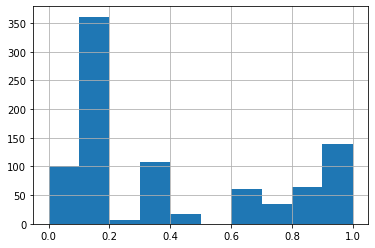

In [18]:
y_pred_prob = best_clf.predict_proba(X_train)
pd.Series(y_pred_prob[:, 1]).hist();

In [26]:
# Случайный лес

clf = RandomForestClassifier()
parameters = {'n_estimators': range(1, 500),
              'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 50),
              'min_samples_split': range(2, 100),
              'min_samples_leaf': range(1, 100)}
#search = GridSearchCV(clf, parameters, cv=5, n_jobs=-1) #, n_iter=5000)
search_cv = RandomizedSearchCV(clf, parameters, cv=5, n_jobs=-1, n_iter=100)

search_cv.fit(X_train, y_train);
best_clf = search_cv.best_estimator_

s = cross_val_score(best_clf, X_train, y_train, cv=5, n_jobs=-1)
s.mean(), s.std()

(0.8159730859103898, 0.013446485997860025)

In [21]:
best_clf.score(X_train, y_train)

0.9113355780022446

In [22]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=48, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=391,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

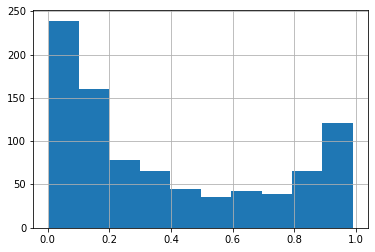

In [23]:
y_pred_prob = best_clf.predict_proba(X_train)
pd.Series(y_pred_prob[:, 1]).hist();

In [24]:
y_pred = X_test.iloc[:, :0]
y_pred['Survived'] = best_clf.predict(X_test)

In [25]:
y_pred.to_csv('gender_submission.csv')

In [ ]:
lol

In [ ]:
# Случайный лес

clf = RandomForestClassifier()
parameters = {'n_estimators': range(1, 200, 5),
              'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 20, 1),
              'min_samples_split': range(2, 10, 1),
              'min_samples_leaf': range(1, 10, 1)}
search = RandomizedSearchCV(clf, parameters, cv=5, n_jobs=-1, n_iter=5000)

search_cv.fit(XX_train, yy_train);
best_clf = search_cv.best_estimator_

yy_pred = XX_test.iloc[:, :0]
yy_pred['Survived'] = best_clf.predict(XX_test)

pd.DataFrame({
    'Accuracy score': [accuracy_score(yy_test, yy_pred)],
    'Precision score': [precision_score(yy_test, yy_pred)],
    'Recall score': [recall_score(yy_test, yy_pred)],
    'F1-score': [f1_score(yy_test, yy_pred)],
    'ROC-AUC': [roc_auc_score(yy_test, yy_pred)]
})